In [47]:
import re
import os
import glob
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
dir_path = '/Users/orm/SODAS/Advanced Social Data Science I/ParlaMint_2.1/Data'
folders = [x[0] for x in os.walk(dir_path) if x[0][-8:-5] == 'txt']
folders = folders + ['/Users/orm/SODAS/Advanced Social Data Science I/ParlaMint_2.1/Data/ParlaMint-ES/ParlaMint-ES.txt', 
                    '/Users/orm/SODAS/Advanced Social Data Science I/ParlaMint_2.1/Data/ParlaMint-HR/ParlaMint-HR.txt', 
                    '/Users/orm/SODAS/Advanced Social Data Science I/ParlaMint_2.1/Data/ParlaMint-HU/ParlaMint-HU.txt',
                    '/Users/orm/SODAS/Advanced Social Data Science I/ParlaMint_2.1/Data/ParlaMint-LV/ParlaMint-LV.txt',
                    '/Users/orm/SODAS/Advanced Social Data Science I/ParlaMint_2.1/Data/ParlaMint-SI/ParlaMint-SI.txt']

In [206]:
df = pd.DataFrame()
counter = 1
for folder in folders:
    df_country = pd.DataFrame()

    os.chdir(folder)
    
    tsv_files = glob.glob('*.{}'.format('tsv'))

    for file in tsv_files:
        path = folder + '/' + file
        df_country = df_country.append(pd.read_csv(path, sep='\t'))

        try:
            df_text = pd.read_csv(path[0:-9] + '.txt', sep = '\t', header = None).rename(columns={0:'ID', 1:'text'})

            df_country['text'] = df_text['text'] 
        except:
            pass
              

    if len(folder) == 101:
        country = folder[-11:-9]
    else:
        country = folder[-6:-4]

    print(f'{country}: {counter} of {len(folders)}')
    counter += 1

    df_country = df_country.assign(country = country)

    df = df.append(df_country)


PL: 1 of 93
PL: 2 of 93
PL: 3 of 93
PL: 4 of 93
PL: 5 of 93
PL: 6 of 93
BE: 7 of 93
BE: 8 of 93
BE: 9 of 93
BE: 10 of 93
BE: 11 of 93
BE: 12 of 93
BE: 13 of 93
CZ: 14 of 93
CZ: 15 of 93
CZ: 16 of 93
CZ: 17 of 93
CZ: 18 of 93
CZ: 19 of 93
CZ: 20 of 93
CZ: 21 of 93
CZ: 22 of 93
IS: 23 of 93
IS: 24 of 93
IS: 25 of 93
IS: 26 of 93
IS: 27 of 93
IS: 28 of 93
IT: 29 of 93
IT: 30 of 93
IT: 31 of 93
IT: 32 of 93
IT: 33 of 93
IT: 34 of 93
IT: 35 of 93
IT: 36 of 93
GB: 37 of 93
GB: 38 of 93
GB: 39 of 93
GB: 40 of 93
GB: 41 of 93
GB: 42 of 93
GB: 43 of 93
DK: 44 of 93
DK: 45 of 93
DK: 46 of 93
DK: 47 of 93
DK: 48 of 93
DK: 49 of 93
DK: 50 of 93
BG: 51 of 93
BG: 52 of 93
BG: 53 of 93
BG: 54 of 93
BG: 55 of 93
BG: 56 of 93
BG: 57 of 93
NL: 58 of 93
NL: 59 of 93
NL: 60 of 93
NL: 61 of 93
NL: 62 of 93
NL: 63 of 93
NL: 64 of 93
FR: 65 of 93
FR: 66 of 93
FR: 67 of 93
FR: 68 of 93
LT: 69 of 93
LT: 70 of 93
LT: 71 of 93
LT: 72 of 93
LT: 73 of 93
LT: 74 of 93
LT: 75 of 93
LT: 76 of 93
LT: 77 of 93
TR: 78 o

In [209]:
df['Speaker_birth'] = [str(i) if i != '-' else np.nan for i in df.Speaker_birth]

df = df.assign(date = [datetime.strptime(i, '%Y-%m-%d') for i in df['From']],
                    Speaker_birth = [datetime.strptime(i, '%Y') if i != 'nan' else i for i in df['Speaker_birth']])

df['Speaker_age'] = [i if pd.isna(i) else round(int(i)/365) for i in ((df.date - df.Speaker_birth).dt.days)]

df['year'] = [int(i[0:4]) for i in df.From]

df['gender'] = [0 if i == 'M' else 1 for i in df.Speaker_gender]

/var/folders/mb/0425zkts7695hq57ytn4rk7m0000gn/T/ipykernel_31607/3766806452.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df = df.assign(date = [datetime.strptime(i, '%Y-%m-%d') for i in df['From']],


In [210]:
df.to_csv("/Users/orm/SODAS/Advanced Social Data Science I/ParlaMint_2.1/ParlaMint_data.csv")

In [4]:
df = pd.read_csv('/Users/orm/SODAS/Advanced Social Data Science I/ParlaMint_2.1/ParlaMint_data.csv', low_memory=False)

/Users/orm/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6,7,8,9,10,16,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df_sub = df[(df.country == "DK") | (df.country == "HU") | (df.country == "GB")]

In [2]:
HU_stopwords = list(pd.read_csv('/Users/orm/SODAS/Advanced Social Data Science I/ParlaMint_2.1/stopwords-hu.txt', header = None).rename(columns={0:'stopwords',})['stopwords'])
DK_stopwords = pd.read_csv('/Users/orm/SODAS/Advanced Social Data Science I/ParlaMint_2.1/stopwords-da.txt', header = None)
EN_stopwords = pd.read_csv('/Users/orm/SODAS/Advanced Social Data Science I/ParlaMint_2.1/stopwords-en.txt', header = None)

In [31]:
HU_stopwords

['a',
 'abba',
 'abban',
 'abból',
 'addig',
 'ahhoz',
 'ahogy',
 'ahol',
 'aki',
 'akik',
 'akkor',
 'akár',
 'alapján',
 'alatt',
 'alatta',
 'alattad',
 'alattam',
 'alattatok',
 'alattuk',
 'alattunk',
 'alá',
 'alád',
 'alájuk',
 'alám',
 'alánk',
 'alátok',
 'alól',
 'alóla',
 'alólad',
 'alólam',
 'alólatok',
 'alóluk',
 'alólunk',
 'amely',
 'amelybol',
 'amelyek',
 'amelyekben',
 'amelyeket',
 'amelyet',
 'amelyik',
 'amelynek',
 'ami',
 'amikor',
 'amit',
 'amolyan',
 'amott',
 'amíg',
 'annak',
 'annál',
 'arra',
 'arról',
 'attól',
 'az',
 'aznap',
 'azok',
 'azokat',
 'azokba',
 'azokban',
 'azokból',
 'azokhoz',
 'azokig',
 'azokkal',
 'azokká',
 'azoknak',
 'azoknál',
 'azokon',
 'azokra',
 'azokról',
 'azoktól',
 'azokért',
 'azon',
 'azonban',
 'azonnal',
 'azt',
 'aztán',
 'azután',
 'azzal',
 'azzá',
 'azért',
 'bal',
 'balra',
 'ban',
 'be',
 'belé',
 'beléd',
 'beléjük',
 'belém',
 'belénk',
 'belétek',
 'belül',
 'belőle',
 'belőled',
 'belőlem',
 'belőletek',
 'b

In [8]:
df_HU = pd.read_csv('/Users/orm/SODAS/Advanced Social Data Science I/ParlaMint_2.1/ParlaMint HU.csv', sep = '|', low_memory= False)

df_HU['year'] = [int(i[0:4]) for i in df_HU.From]

In [9]:
cleaned_list_HU = []

for i in df_HU['Text']:
    try:
        speech = re.findall(r'\b\S+\b', i)
        cleaned_list_HU.append([i.lower() for i in speech if i.lower() not in HU_stopwords])
    except:
        cleaned_list_HU.append([])

len(cleaned_list_HU)
df_HU['cleaned_text'] = cleaned_list_HU

In [91]:
df_HU.dtypes

Unnamed: 0              int64
ID                     object
Title                  object
From                   object
To                     object
House                  object
Term                   object
Session                object
Meeting                object
Sitting                object
Agenda                 object
Subcorpus              object
Speaker_role           object
Speaker_type           object
Speaker_party          object
Speaker_party_name     object
Party_status           object
Speaker_name           object
Speaker_gender         object
Speaker_birth          object
text                   object
country                object
date                   object
Speaker_age           float64
year                    int64
gender                  int64
cleaned_text           object
dtype: object

In [10]:
df_HU_2014 = df_HU[df_HU.year == 2014]
df_HU_2015 = df_HU[df_HU.year == 2015]
df_HU_2016 = df_HU[df_HU.year == 2016]
df_HU_2017 = df_HU[df_HU.year == 2017]
df_HU_2018 = df_HU[df_HU.year == 2018]
df_HU_2019 = df_HU[df_HU.year == 2019]
df_HU_2020 = df_HU[df_HU.year == 2020]

In [88]:
df_HU_2015.cleaned_text

4725730    [kiss, lászló, mszp, szót, elnök, tisztelt, mi...
4725731    [magyar, zoltán, jobbik, szót, elnök, tisztelt...
4725732    [z, kárpát, dániel, jobbik, tisztelt, elnök, t...
4725733    [dr, szél, bernadett, lmp, szót, elnök, tiszte...
4725734    [schmuck, erzsébet, lmp, tisztelt, miniszter, ...
                                 ...                        
4728658    [schmuck, erzsébet, lmp, tisztelt, miniszter, ...
4728659    [hollik, istván, kdnp, szót, tisztelt, elnök, ...
4728660    [gőgös, zoltán, mszp, elnök, szót, tisztelt, k...
4728661    [dr, galambos, dénes, fidesz, szót, elnök, tis...
4728662    [pócs, jános, fidesz, szót, elnök, tisztelt, á...
Name: cleaned_text, Length: 574, dtype: object

In [11]:
df_HU_dict = []

for year in [df_HU_2014, df_HU_2015, df_HU_2016, df_HU_2017, df_HU_2018, df_HU_2019, df_HU_2020]:

    print(year.cleaned_text[0:10])

    df_HU_text = []

    for i in year.cleaned_text:
        df_HU_text.extend(i)

    print(df_HU_text[0:10])
    # how often does which word occur
    relevant_all_bio_words_frequencies = {
        word:df_HU_text.count(word)/len(df_HU_text) for word in df_HU_text
    }


    # sort according to frequency
    sorted_relevant_all_bio_words_frequencies = dict(sorted(
        relevant_all_bio_words_frequencies.items(),
        key = lambda item: item[1], reverse = True
    ))

    df_HU_dict.append(sorted_relevant_all_bio_words_frequencies)



0    [kunhalmi, ágnes, mszp, elnök, szót, tisztelt,...
1    [korózs, lajos, mszp, tisztelt, ház, kedves, m...
2    [harangozó, gábor, istván, mszp, elnök, tiszte...
3    [dr, szél, bernadett, lmp, szót, elnök, tiszte...
4    [sallai, r, benedek, lmp, szót, tisztelt, elnö...
5    [balczó, zoltán, jobbik, szót, elnök, tisztelt...
6    [dr, staudt, gábor, jobbik, tisztelt, elnök, t...
7    [egyed, zsolt, jobbik, szót, tisztelt, elnök, ...
8    [bangóné, borbély, ildikó, mszp, tisztelt, áll...
9    [z, kárpát, dániel, jobbik, tisztelt, elnök, t...
Name: cleaned_text, dtype: object
['kunhalmi', 'ágnes', 'mszp', 'elnök', 'szót', 'tisztelt', 'miniszter', 'befejeződik', 'iskola', 'gyermeke']
275    [dr, hoffmann, rózsa, kdnp, elnök, tisztelt, á...
276    [dr, harangozó, tamás, attila, mszp, szót, eln...
277    [bánki, erik, fidesz, szót, tisztelt, elnök, t...
278    [mirkóczki, ádám, jobbik, szót, elnök, tisztel...
279    [volner, jános, jobbik, elnök, tisztelt, állam...
280    [bangóné, borbé

In [101]:
words = ['taps', 'európai', 'európa', 'brüsszel', 'soros', 'ukrajna', 'juncker', 'kárpátalja', 'egészségügy', 'migráns', 'migránsok', 'adó', 'adócsalás', 'korrupció', 'tek', 'nemzetbiztonság', 'nemzetbiztonsági']

df_HU_freq = pd.DataFrame({'word' : [],
                    'freq' : [], 
                    'year' : []})

for word in words:
    word_freq = []
    for year in df_HU_dict:
        try:
            word_freq.append(year[word])
        except:
            word_freq.append(0)
    years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
    words = [word for _ in years] 
    df_HU_freq = df_HU_freq.append(pd.DataFrame({'word': word, 'freq' : word_freq, 'year' : years}), ignore_index = True)



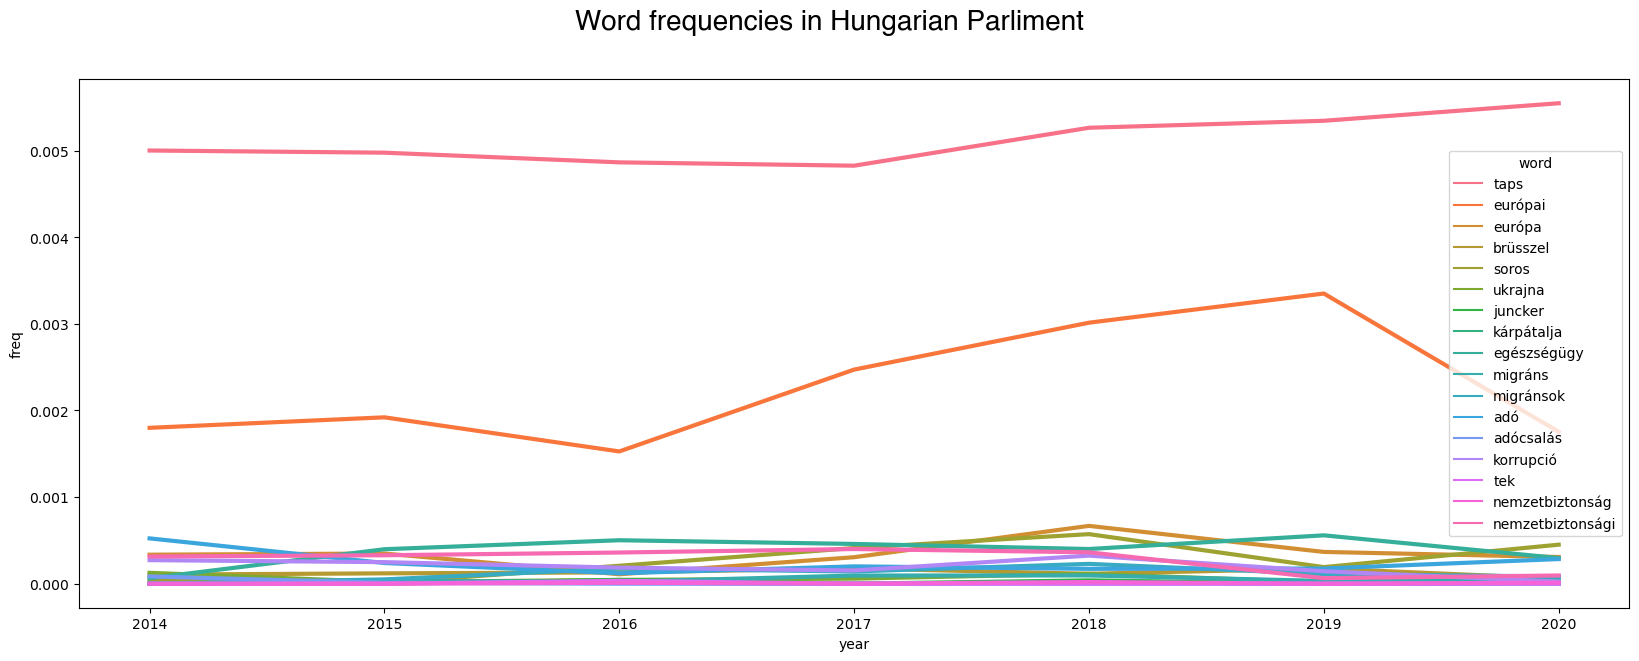

In [102]:
hfont = {'fontname':'Helvetica'}
fig, axes = plt.subplots(figsize=(20, 7), dpi = 100)

sns.lineplot(x = "year",
             y = "freq",
             hue = "word",
             data = df_HU_freq,
             linewidth = 3)

fig.suptitle('Word frequencies in Hungarian Parliment', size = 20, **hfont);


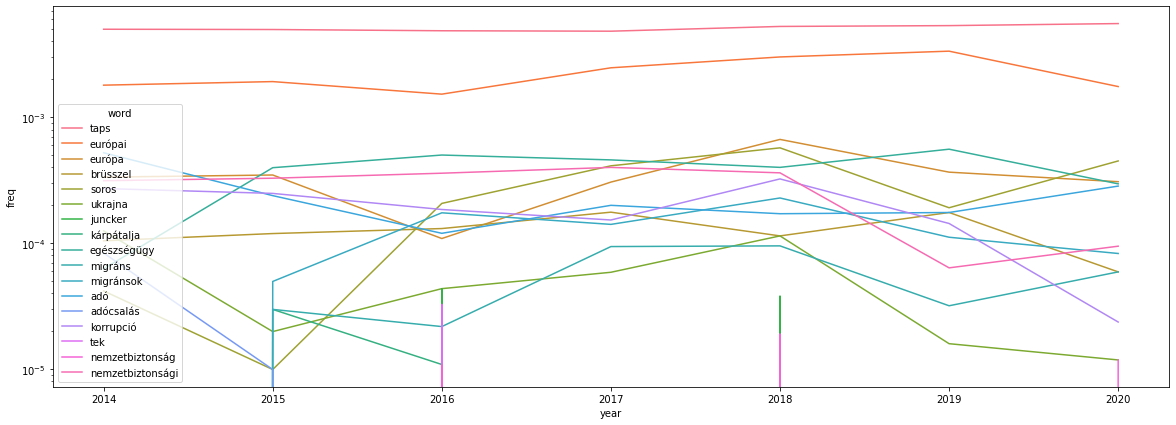

In [103]:
fig, axes = plt.subplots(figsize=(20, 7))

sns.lineplot(x = "year",
             y = "freq",
             hue = "word",
             data = df_HU_freq);
plt.yscale('log')

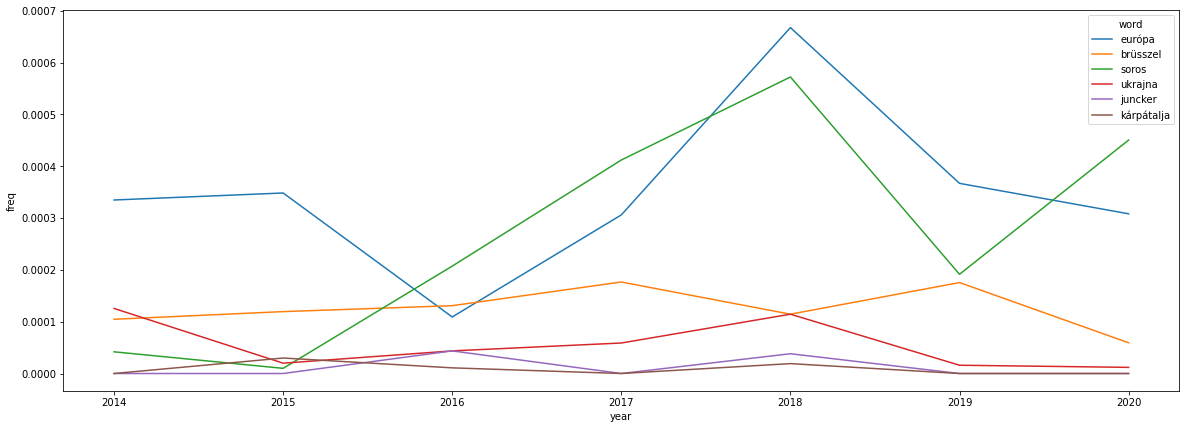

In [62]:
fig, axes = plt.subplots(figsize=(20, 7))
sns.lineplot(x = "year",
             y = "freq",
             hue = "word",
             data = df_HU_freq[(df_HU_freq.word != 'európai') & (df_HU_freq.word != 'taps')]);

In [74]:
d = df_HU.dropna(subset=['Speaker_birth'])

In [75]:
df_HU['Speaker_birth'] = [str(i) if i != '-' else np.nan for i in df_HU.Speaker_birth]


df_HU = df_HU.assign(date = [datetime.strptime(i, '%Y-%m-%d') for i in df_HU['From']],
                    Speaker_birth = [datetime.strptime(i, '%Y') if i != 'nan' else i for i in df_HU['Speaker_birth']])

df_HU['Speaker_age'] = [i if pd.isna(i) else round(int(i)/365) for i in ((df_HU.date - df_HU.Speaker_birth).dt.days)]

df_HU['year'] = [int(i[0:4]) for i in df_HU.From]

df_HU['gender'] = [0 if i == 'M' else 1 for i in df_HU.Speaker_gender]

/var/folders/mb/0425zkts7695hq57ytn4rk7m0000gn/T/ipykernel_42654/1368011097.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_HU = df_HU.assign(date = [datetime.strptime(i, '%Y-%m-%d') for i in df_HU['From']],


In [82]:
df_representation = df_HU.groupby('date').agg(
    gender = pd.NamedAgg(column='gender', aggfunc= np.mean),
    age = pd.NamedAgg(column='Speaker_age', aggfunc= np.mean),
    year = pd.NamedAgg(column='year', aggfunc= np.mean),
)

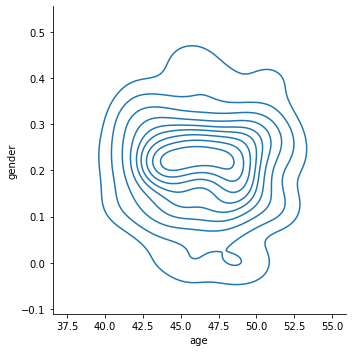

In [100]:
#fig, axes = plt.subplots(figsize=(8, 8), dpi = 100)
sns.displot( df_representation, x="age", y="gender", kind = 'kde');


#g = sns.FacetGrid(df_representation, col="year")
#g.map(sns.displot, "age", "gender")